In [ ]:
#hide
#skip
! [ -e /content ] && pip install -Uqq babino2020masks

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
#hide
from babino2020masks.core import *
from babino2020masks.lasso import *
from babino2020masks.counterfactual import *

# Masks and COVID-19: a causal framework for imputing value to public-health interventions

> Code to reproduce [Masks and COVID-19](https://arxiv.org/abs/2006.05532).

This is a refactored version of the original [code](https://github.com/ababino/corona). 

## Install

`pip install babino2020masks`

## How to use

### Gather data

In [ ]:
ny = API(api_settings['NYS'][:2], **api_settings['NYS'][2])
df = ny.get_all_data_statewide()

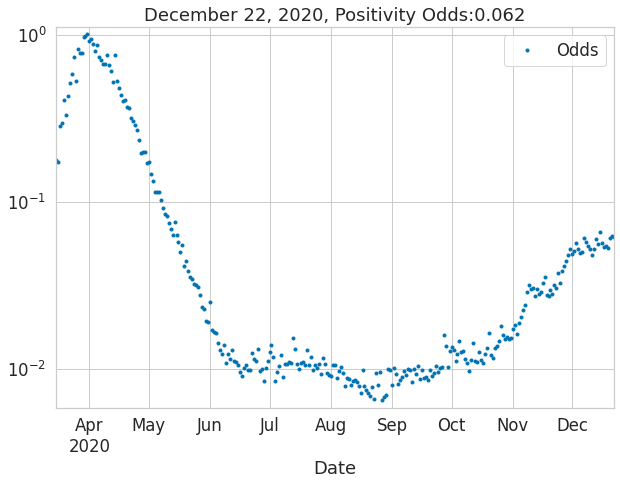

In [ ]:
ax = plot_data_and_fit(df, 'Date', 'Odds', None, None, None, figsize=(10, 7))
ax.set_title(f'{df.tail(1).Date[0]:%B %d, %Y}, Positivity Odds:{df.tail(1).Odds[0]:2.3}');

### Fit the model

In [ ]:
sdf = df.loc[df.Date<='15-05-2020'].copy()
lics = LassoICSelector(sdf['Odds'], 'bic')
lics.fit_best_alpha()

### Positivity Odds in NYS

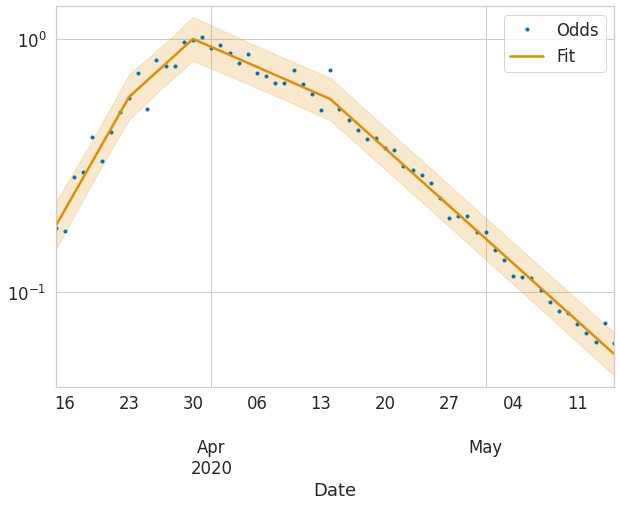

In [ ]:
sdf['Fit'], sdf['Odds_l'], sdf['Odds_u'] = lics.odds_hat_l_u()
ax = plot_data_and_fit(sdf, 'Date', 'Odds', 'Fit', 'Odds_l', 'Odds_u', figsize=(10, 7))

### Instantaneous reproduction number, $R_t$

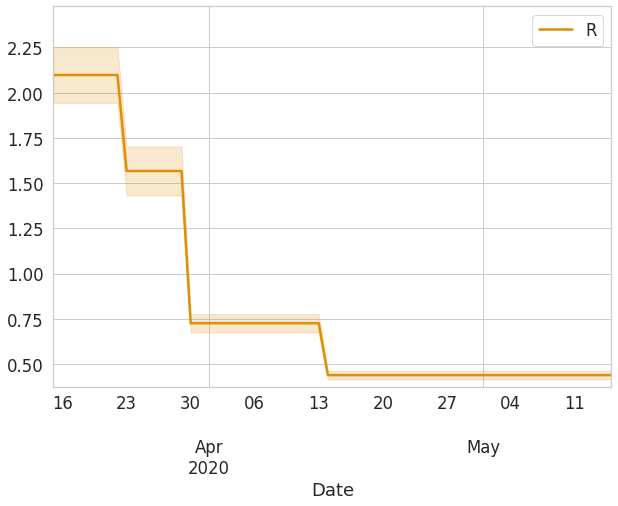

In [ ]:
sdf['R'], sdf['Rl'], sdf['Ru'] = lics.rt()
ax = plot_data_and_fit(sdf, 'Date', None, 'R', 'Rl', 'Ru', figsize=(10, 7), logy=False, palette=[colorblind[1],colorblind[1]])

### Counterfactual Scenario without  Masks

In [ ]:
sdf['Cf. Odds'], sdf['cf_odds_l'], sdf['cf_odds_u'] = lics.counterfactual()

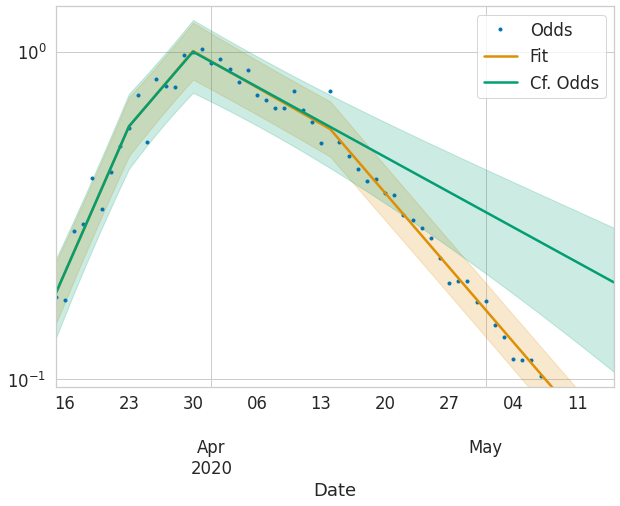

In [ ]:
ax = plot_data_and_fit(sdf, 'Date', 'Odds', 'Fit', 'Odds_l', 'Odds_u', figsize=(10, 7))
plot_data_and_fit(sdf, 'Date', None, 'Cf. Odds', 'cf_odds_l', 'cf_odds_u', palette=[colorblind[2],colorblind[2]], ax=ax);

In [ ]:
#hide_input
from datetime import datetime
print(f'Last updated on {datetime.today():%m/%d/%Y %H:%M:%S}')

Last updated on 12/24/2020 13:39:40
